# Title: Time-series mapping of race in New York City

#### Description: 
This file consolidates population data from the American Community Survey (ACS) for the period 2010-2017 to analyze changes in the distribution of races in NYC.

#### Date updated: 
26-Jul-19 

#### Author: 
Anuja Venkatachalam

#### 1. Set-up

In [1]:
#importing the requisite packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
pd.set_option("display.max_columns", 100)
import glob

In [2]:
#setting file paths
raw="C:/Users/Anuja/Desktop/Data_projects/2_Race_mapping/Raw/"
clean="C:/Users/Anuja/Desktop/Data_projects/2_Race_mapping/Clean/"

#### 2. Consolidating census data on race in NY (2010-2017)

In [3]:
#importing files separately as the Census Bureau has different codes for each year!

#Census 2010, 2011 and 2012 have the same variable codes
for year in range(10,13):
        year=str(year)
        print(f"This is year {year}")
        census_df=pd.read_csv(raw+"ACS_"+year+"_5YR_DP05.csv", encoding="Latin1")
        census_df=census_df[["GEO.id","GEO.id2","GEO.display-label",
                                 "HC01_VC38", "HC01_VC39","HC01_VC40",
                                 "HC01_VC43","HC01_VC44", "HC01_VC45",
                                 "HC01_VC50","HC01_VC58","HC01_VC63"]]
        census_df=census_df.rename(columns={
            "HC01_VC38" :"total_pop",
            "HC01_VC39" : "one_race",
            "HC01_VC40" : "two_or_more",
            "HC01_VC43" :"white",
            "HC01_VC44" : "black",
            "HC01_VC45" : "am_indian_native",
            "HC01_VC50" : "asian",
            "HC01_VC58" : "native_hawai",
            "HC01_VC63" : "other_one_race"
            })
        census_df["year"]="20"+year
        #checks
        census_df["race_count"]=census_df["one_race"]+census_df["two_or_more"]
        census_df["race_type_count"]=census_df["white"]+census_df["black"]+census_df["am_indian_native"]+census_df["asian"]+census_df["native_hawai"]+census_df["other_one_race"]
        census_df.loc[census_df["race_count"]!=census_df["total_pop"], "race_count_error"]=1
        census_df.loc[census_df["race_type_count"]!=census_df["one_race"], "race_type_count_error"]=1
        census_df.to_csv(clean+"clean"+year+".csv", index=False)

This is year 10
This is year 11
This is year 12


In [4]:
#Census 2013, 2014, 2015 and 2016 have the same variable codes

for year in range(13,17):
        year=str(year)
        print(f"This is year {year}")
        census_df=pd.read_csv(raw+"ACS_"+year+"_5YR_DP05.csv", encoding="Latin1")
        census_df=census_df[["GEO.id","GEO.id2","GEO.display-label","HC01_VC43","HC01_VC44",
                           "HC01_VC45", "HC01_VC49","HC01_VC50","HC01_VC51","HC01_VC56","HC01_VC64","HC01_VC69"]]
        census_df=census_df.rename(columns={
            "HC01_VC43":"total_pop",
            "HC01_VC44":"one_race",
            "HC01_VC45":"two_or_more",
            "HC01_VC49":"white",
            "HC01_VC50":"black",
            "HC01_VC51":"am_indian_native",
            "HC01_VC56":"asian",
            "HC01_VC64":"native_hawai",
            "HC01_VC69":"other_one_race"
            })
        census_df["year"]="20"+year
        #checks
        census_df["race_count"]=census_df["one_race"]+census_df["two_or_more"]
        census_df["race_type_count"]=census_df["white"]+census_df["black"]+census_df["am_indian_native"]+census_df["asian"]+census_df["native_hawai"]+census_df["other_one_race"]
        census_df.loc[census_df["race_count"]!=census_df["total_pop"], "race_count_error"]=1
        census_df.loc[census_df["race_type_count"]!=census_df["one_race"], "race_type_count_error"]=1
        census_df.to_csv(clean+"clean"+year+".csv", index=False)


This is year 13
This is year 14
This is year 15
This is year 16


In [5]:
# Census 2017 has different codes

year="17"
print(f"This is year {year}")
census_df=pd.read_csv(raw+"ACS_"+year+"_5YR_DP05.csv", encoding="Latin1")
census_df=census_df[["GEO.id","GEO.id2","GEO.display-label","HC01_VC48",
                    "HC01_VC49","HC01_VC50","HC01_VC54","HC01_VC55",
                    "HC01_VC56","HC01_VC61","HC01_VC69","HC01_VC74"]] 
census_df=census_df.rename(columns={
            "HC01_VC48":"total_pop",
            "HC01_VC49":"one_race",
            "HC01_VC50":"two_or_more",
            "HC01_VC54":"white",
            "HC01_VC55":"black",
            "HC01_VC56":"am_indian_native",
            "HC01_VC61":"asian",
            "HC01_VC69":"native_hawai",
            "HC01_VC74":"other_one_race"
        })
census_df["year"]="20"+year
#checks
census_df["race_count"]=census_df["one_race"]+census_df["two_or_more"]
census_df["race_type_count"]=census_df["white"]+census_df["black"]+census_df["am_indian_native"]+census_df["asian"]+census_df["native_hawai"]+census_df["other_one_race"]
census_df.loc[census_df["race_count"]!=census_df["total_pop"], "race_count_error"]=1
census_df.loc[census_df["race_type_count"]!=census_df["one_race"], "race_type_count_error"]=1
census_df.to_csv(clean+"clean"+year+".csv", index=False)


This is year 17


In [6]:
# Importing the clean csv files

all_files = glob.glob(clean+"clean*.csv")

list = []

for filename in all_files:
    each_df=pd.read_csv(filename)
    list.append(each_df)

df=pd.concat(list, axis=0, sort=False)

#### 3. Analysis

In [7]:
#Checking errors -- no errors
df[df.race_count_error.notnull()]
df[df.race_type_count_error.notnull()]

df=df.drop(columns=["race_count_error","race_type_count_error"])

df.to_csv(clean+"mapbox.csv")

In [8]:
df.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'total_pop', 'one_race',
       'two_or_more', 'white', 'black', 'am_indian_native', 'asian',
       'native_hawai', 'other_one_race', 'year', 'race_count',
       'race_type_count'],
      dtype='object')

In [37]:
temp=df.groupby(by="year").sum()
temp.reset_index(inplace=True)
temp["year"]=temp["year"].astype(str)

In [46]:
temp["one_pct"]=temp["one_race"]/temp["total_pop"]*100
temp["pct"]=100

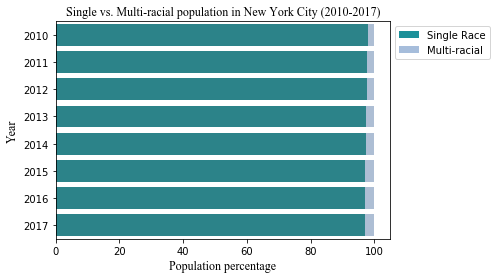

In [74]:
sns.barplot(data=temp, y="year",x="pct", orient="h", color="#a6bddb")
ax=sns.barplot(data=temp, y="year",x="one_pct",orient="h", color="#1c9099")
topbar=plt.Rectangle((0,0),1,1,fc="#a6bddb", edgecolor = 'none')
bottombar= plt.Rectangle((0,0),1,1,fc="#1c9099",  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ["Single Race", "Multi-racial"], loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel("Year", fontname='Times New Roman', fontsize=12)
ax.set_xlabel("Population percentage", fontname='Times New Roman', fontsize=12)
plt.title("Single vs. Multi-racial population in New York City (2010-2017)", fontname='Times New Roman', fontsize=12)
plt.savefig(clean+"racial_split.png")